In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("Finance.csv")

In [3]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
238,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,Y
53,LP001179,Male,Yes,2,Graduate,No,4616,0.0,134.0,360.0,1.0,Urban,N
550,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,N
101,LP001349,Male,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# get the percentage of missing values
df.isna().sum() * 100 / len(df) 

# handling Missing Values

<Axes: xlabel='count', ylabel='Gender'>

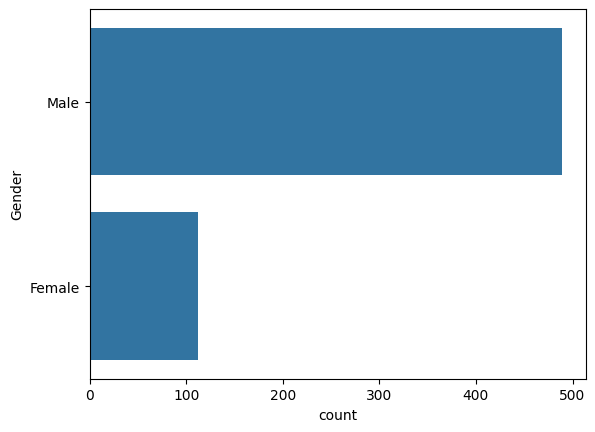

In [7]:
sns.countplot(df['Gender'])

In [8]:
# since we have more male we will assing male to missing value spaces
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

<Axes: xlabel='count', ylabel='Married'>

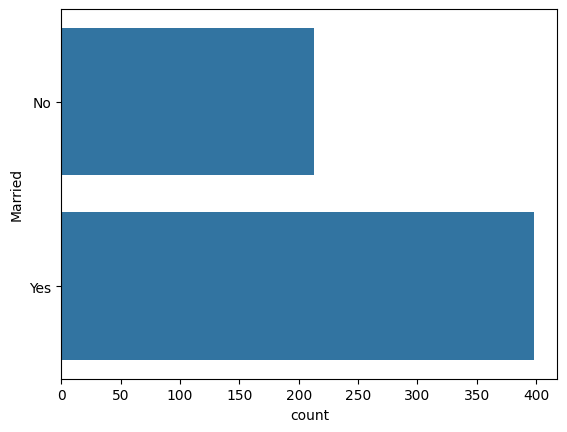

In [9]:
sns.countplot(df['Married'])

In [10]:
# similar to gender we impute mode
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

<Axes: xlabel='count', ylabel='Dependents'>

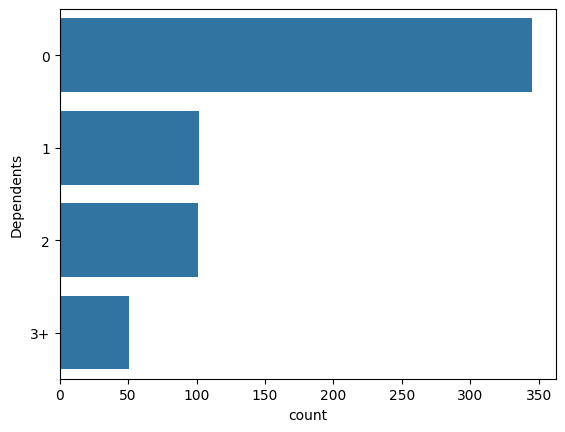

In [11]:
sns.countplot(df['Dependents'])

In [12]:
# similar to gender we impute mode
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

<Axes: xlabel='count', ylabel='Self_Employed'>

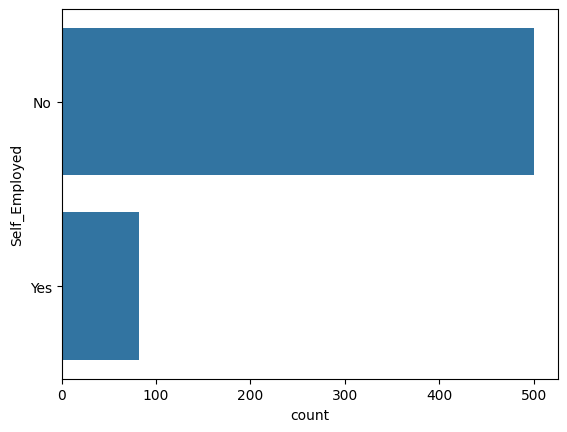

In [13]:
sns.countplot(df['Self_Employed'])

In [14]:
# similar to gender we impute mode
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [15]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [16]:
df["LoanAmount"].median()

np.float64(128.0)

In [17]:
# we will impute median because it is resilient to outliers. we won't use mean because it is outlier unresilient
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [18]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

<Axes: xlabel='Credit_History', ylabel='count'>

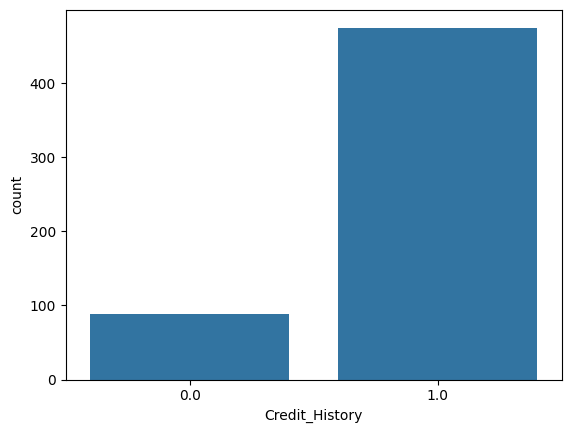

In [19]:
sns.countplot(x = df['Credit_History'])

In [20]:
# similar to gender we impute mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Feature Engineering

In [21]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
166,LP001577,Female,Yes,0,Graduate,No,4583,0.0,112.0,360.0,1.0,Rural,N


In [22]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [23]:
# # removing unwanted features
df = df.drop(columns = ["Loan_ID"], axis = 1)

In [24]:
# # encoding different datatypes to numbers
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 2})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [26]:
df = pd.get_dummies(df, columns = ['Dependents', 'Property_Area'])

In [27]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,2,1,0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,True
1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,False,True,False,False
2,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,True,False,False,False,False,False,True
3,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,True,False,False,False,False,False,True
4,0,2,1,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    bool   
 11  Dependents_1             614 non-null    bool   
 12  Dependents_2             614 non-null    bool   
 13  Dependents_3+            614 non-null    bool   
 14  Property_Area_Rural      6

In [29]:
Y = df['Loan_Status']
X = df.drop(columns = "Loan_Status", axis = 1)

In [30]:
X.shape, Y.shape

((614, 16), (614,))

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [32]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((491, 16), (123, 16), (491,), (123,))

In [33]:
model = RandomForestClassifier(
    random_state = 0,
    max_depth = 5, # set the depth of the decision tree
    min_samples_split = 0.01, # threshold to stop splitting
    max_features = 0.8, # tells how much of the available features we will consider
    max_samples = 0.8 ## tell how much data we use during splitting decsion making
)

In [34]:
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features=0.8, max_samples=0.8,
                       min_samples_split=0.01, random_state=0)

In [35]:
train_prediction = model.predict(X_train)

In [36]:
test_prediction = model.predict(X_test)

In [37]:
train_accuracy_score = accuracy_score(train_prediction, Y_train)
test_accuracy_score = accuracy_score(test_prediction, Y_test)
print(train_accuracy_score, test_accuracy_score)

0.8207739307535642 0.8211382113821138


In [38]:
print("Random Forest Report:\n", classification_report(Y_test, test_prediction))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



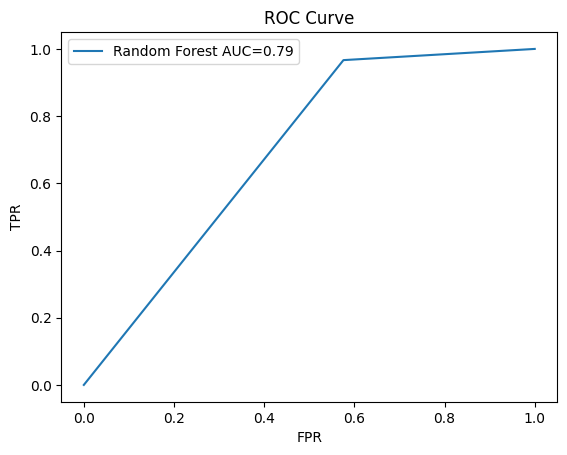

F1 Score - Random Forest: 0.8877551020408163
AUC Score - Random Forest: 0.7885521885521884


In [42]:


# F1 Score
f1_rf = f1_score(Y_test, test_prediction)

# ROC-AUC
y_proba_rf = model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(Y_test, y_proba_rf)

# Plot ROC
fpr, tpr, _ = roc_curve(Y_test, test_prediction)
plt.plot(fpr, tpr, label=f"Random Forest AUC={auc_rf:.2f}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"F1 Score - Random Forest: {f1_rf}")
print(f"AUC Score - Random Forest: {auc_rf}")


# finding the important features in our decision making process

In [43]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = list(X.columns)
importances.columns = ['importance', 'feature']
importances.sort_values(by = 'importance', ascending = True, inplace = True)

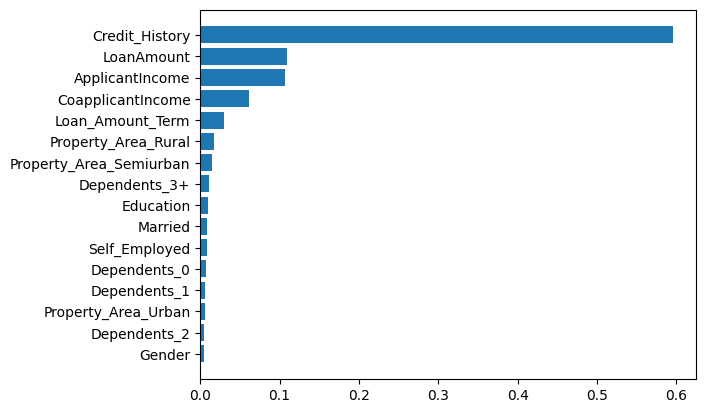

In [47]:
plt.barh(importances['feature'], importances.importance)
plt.show()